# Putting Sms Into Work

1. You need to analyse the sms data and answer the questions listed below.
2. You are free to use anything of your choice.
3. The data provided is highly sensitive so please don't share with anyone

 Starting by importing the useful libraries

In [ ]:
import regex
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import json
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df

Converting the given JSON file to Pandas DataFrame

In [ ]:
data = pd.read_json("Downloads/data.json")

Now, we have created a dataframe named data 

Let's see the first five rows of our data

In [ ]:
data.head()

,user_message_id,sender,message,timestamp,created_at,user_id,user_subscription_id
0,4317860,ADSBUXIN,"Hi, our siren is at home and safe and we hope ...",2020-03-25 07:33:39.442,2021-09-16 04:43:11.234000+00:00,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN
1,4317861,TMKOTAKB,"Due to COVID-19, some of the banking services ...",2020-03-25 06:34:38.445,2021-09-16 04:43:11.236000+00:00,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN
2,4317862,ADMONVEW,Youre a few steps away from completing your Cr...,2020-03-25 06:04:45.183,2021-09-16 04:43:11.238000+00:00,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN
3,4317863,VKEZHOME,"Hi Niraj, a special Home Loan offer for you: \...",2020-03-25 06:02:46.155,2021-09-16 04:43:11.241000+00:00,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN
4,4317864,JXJIOMNY,"Dear JioMoney Customer, Pay from Home using My...",2020-03-25 05:54:36.521,2021-09-16 04:43:11.244000+00:00,40ec6ba2-af1b-4037-9e01-3d108faa937b,NaN


### DATA PREPOCESSING

There are some columns which are not useful to our analysis

Here User message id doesn't have any importance. So, let's remove the User message Id column. 
Also, user_subscription id is not useful to us. We can drop that too.
Data is created in the month of september. This has no use in analyzing. it can also be dropped

In [ ]:
data.drop({'user_message_id','user_subscription_id','created_at'},axis='columns',inplace=True)

Checking if they are dropped successfully.....

In [ ]:
data.head()

,sender,message,timestamp,user_id
0,ADSBUXIN,"Hi, our siren is at home and safe and we hope ...",2020-03-25 07:33:39.442,40ec6ba2-af1b-4037-9e01-3d108faa937b
1,TMKOTAKB,"Due to COVID-19, some of the banking services ...",2020-03-25 06:34:38.445,40ec6ba2-af1b-4037-9e01-3d108faa937b
2,ADMONVEW,Youre a few steps away from completing your Cr...,2020-03-25 06:04:45.183,40ec6ba2-af1b-4037-9e01-3d108faa937b
3,VKEZHOME,"Hi Niraj, a special Home Loan offer for you: \...",2020-03-25 06:02:46.155,40ec6ba2-af1b-4037-9e01-3d108faa937b
4,JXJIOMNY,"Dear JioMoney Customer, Pay from Home using My...",2020-03-25 05:54:36.521,40ec6ba2-af1b-4037-9e01-3d108faa937b


Perfect..!!
Let's go ahead

Let's find out out the number of users from whom the data is taken out.

In [ ]:
data["user_id"].nunique()

882

Wow, data comprises of messages received to 882 users

 Analyzing the messages of the given particular user

In [ ]:
# msg of a given user id
user_msg = data[data["user_id"]=="2ddd42ce-245c-4c98-a563-a45435038a67"]

In [ ]:
user_msg.head()

,sender,message,timestamp,user_id
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67


##### Question 1 

In [ ]:
# filter out transactional messages(10 pts)
# Hint: Filter messages based on keywords
# .*spent.*
# .*debited.*
# .*charged.*
# .*paid.*
# .*sent.*
# .*txn.*
# .*billed.*
# .*transaction.*

Let's check if the message is acknowledging a transaction done using some keywords related to transactions

##### Adding the key word "credited" ,"received"  to the above list of key words

In [ ]:
user_msg['transactional msgs']=user_msg['message'].str.contains('credited | received | spent | debited | charged | paid | sent | txn | billed | transaction')
user_msg

,sender,message,timestamp,user_id,transactional msgs
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,True
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,True
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,True
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,True
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,True
...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,True
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,False
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,True
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,True


Now, let's see the number of transactional messages

In [ ]:
user_msg['transactional msgs'].value_counts()

False    1801
True      644
Name: transactional msgs, dtype: int64

So, based on the above keywords, there are 644 transactional messages of this user

##### Checking if all the numbers actually involve transaction

Let's check the messages involving credited keyword in them

In [ ]:
user_msg['credited msgs']=user_msg['message'].str.contains(' credited ')
credited_msgs_df=user_msg[user_msg['credited msgs']==True]
credited_msgs_df

,sender,message,timestamp,user_id,transactional msgs,credited msgs
4589116,AX-HDFCBK,"HDFC Bank Cardmember, Payment of Rs 1 was cred...",2021-09-06 06:06:16.080,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
4589117,AX-HDFCBK,"HDFC Bank Cardmember, Payment of Rs 22499 was ...",2021-09-06 06:06:15.865,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
4589118,AD-HDFCBK,"HDFC Bank Cardmember, Payment of Rs 28900 was ...",2021-09-06 06:06:10.588,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
4589172,JD-ICICIB,"Dear Customer, refund of INR 9990 from AMAZON ...",2021-09-02 00:38:12.538,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
4589182,AX-UniCrd,A refund of Rs.1 for your Uni card transaction...,2021-09-01 08:36:14.611,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
...,...,...,...,...,...,...
4591378,TM-ICICIB,"Dear Customer, Refund of INR 899 from AMAZON h...",2021-03-12 08:40:16.460,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
4591382,VR-ViCARE,Hi! Payment of Rs. 1178.82 is credited to your...,2021-03-11 11:06:26.464,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
4591406,AX-HDFCBK,"Dear HDFCBank cardmember, Payment of Rs 51203 ...",2021-03-10 02:25:39.230,2ddd42ce-245c-4c98-a563-a45435038a67,True,True
4591482,AD-HDFCBK,54 bonus Reward Points credited to your HDFC B...,2021-03-02 13:05:17.702,2ddd42ce-245c-4c98-a563-a45435038a67,True,True


we can see that some of these messages includes points credited which are not transactions. 

Let's seperate these messages and delete them

In [ ]:
credited_msgs_df['points']=credited_msgs_df['message'].str.contains(' points | Points')
credited_msgs_df['points'].value_counts()

False    89
True      9
Name: points, dtype: int64

Hoooo....!

9 messages which do not actually involve transaction sneaked in

Now out of 644 messages we found earlier with the keywords, 9 messages are not actual transactional messages. 

So, there are around 635 transactional messages as of now

I have found later that there are some other messages which are not acknowleding the transaction

We'll see them as we move on

#### Question 2

In [ ]:
# His expense and earning for a particular month? (40 pts)
# Hint: Use https://duckling.wit.ai/ for parsing money
# Find out total money credited and total money debited

Creating a seperate dataframe involving only transactional messages

In [ ]:
transactional_messages=user_msg[user_msg['transactional msgs']==True]
transactional_messages

,sender,message,timestamp,user_id,transactional msgs,credited msgs
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
...,...,...,...,...,...,...
4591610,BP-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 546...",2021-08-08 13:52:38.069,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,True,False
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,True,False


Now, we can drop the transactional msgs and credited msgs columns from our data sets as we do not have any further use of them.

In [ ]:
user_msg.drop({'transactional msgs','credited msgs'},axis='columns',inplace=True)
#transactional_messages.drop({'transactional msgs','credited msgs',axis='columns',inplace=True})

Seperating the data according to the month to find his montly income and expenses.

In [ ]:
transactional_messages['timestamp']=transactional_messages['timestamp'].astype(str)
transactional_messages['january']=transactional_messages['timestamp'].str.contains('-01-')
transactional_messages

,sender,message,timestamp,user_id,transactional msgs,credited msgs,january
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
...,...,...,...,...,...,...,...
4591610,BP-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 546...",2021-08-08 13:52:38.069,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,True,False,False


In [ ]:
transactional_messages['january'].value_counts()

False    644
Name: january, dtype: int64

Ohh...! Data does not include the transactions of january because it's hard to believe that there are no transactions in enitre january

Now, let's see for other months 

In [ ]:
transactional_messages['february']=transactional_messages['timestamp'].str.contains('-02-')
transactional_messages['march']=transactional_messages['timestamp'].str.contains('-03-')
transactional_messages['april']=transactional_messages['timestamp'].str.contains('-04-')
transactional_messages['may']=transactional_messages['timestamp'].str.contains('-05-')
transactional_messages['june']=transactional_messages['timestamp'].str.contains('-06-')
transactional_messages['july']=transactional_messages['timestamp'].str.contains('-07-')
transactional_messages['august']=transactional_messages['timestamp'].str.contains('-08-')
transactional_messages['september']=transactional_messages['timestamp'].str.contains('-09-')
transactional_messages['october']=transactional_messages['timestamp'].str.contains('-10-')
transactional_messages['november']=transactional_messages['timestamp'].str.contains('-11-')
transactional_messages['december']=transactional_messages['timestamp'].str.contains('-12-')

Let's see the number of transactions in each month

In [ ]:
transactional_messages['february'].value_counts()

False    634
True      10
Name: february, dtype: int64

In [ ]:
transactional_messages['march'].value_counts()

False    558
True      86
Name: march, dtype: int64

In [ ]:
transactional_messages['april'].value_counts()

False    550
True      94
Name: april, dtype: int64

In [ ]:
transactional_messages['may'].value_counts()

False    570
True      74
Name: may, dtype: int64

In [ ]:
transactional_messages['june'].value_counts()

False    563
True      81
Name: june, dtype: int64

In [ ]:
transactional_messages['july'].value_counts()

False    513
True     131
Name: july, dtype: int64

In [ ]:
transactional_messages['august'].value_counts()

False    514
True     130
Name: august, dtype: int64

In [ ]:
transactional_messages['september'].value_counts()

False    606
True      38
Name: september, dtype: int64

In [ ]:
transactional_messages['october'].value_counts()

False    644
Name: october, dtype: int64

In [ ]:
transactional_messages['november'].value_counts()

False    644
Name: november, dtype: int64

In [ ]:
transactional_messages['december'].value_counts()

False    644
Name: december, dtype: int64

As expected there are no transactions in october, november and december as we are still in october of 2021

Let's see the data of July and August as they involve more number of transactions

In [ ]:
July_data=transactional_messages[transactional_messages['july']==True]
August_data=transactional_messages[transactional_messages['august']==True]


Now,dropping the columns with which we have no further use

In [ ]:
July_data.drop({'transactional msgs','credited msgs','january','february','march','april','may','june','august','july','september','october','november','december'},axis='columns',inplace=True)


In [ ]:
August_data.drop({'transactional msgs','credited msgs','january','february','march','april','may','june','august','july','september','october','november','december'},axis='columns',inplace=True)
August_data

,sender,message,timestamp,user_id
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67
4589190,VM-SBIUPI,ICICI Lombard GIC Ltd has requested Rs1228 frm...,2021-08-31 04:56:07.977,2ddd42ce-245c-4c98-a563-a45435038a67
4589195,TM-ICICIB,"Dear Customer, Payment of INR 14999 has been r...",2021-08-31 00:50:48.497,2ddd42ce-245c-4c98-a563-a45435038a67
4589196,VR-ViRoam,Welcome to Vi Gujarat. Stay connected with Vi ...,2021-08-30 17:02:47.298,2ddd42ce-245c-4c98-a563-a45435038a67
...,...,...,...,...
4589672,VR-ViRoam,Welcome to Vi Gujarat. Stay connected with Vi ...,2021-08-01 07:57:55.250,2ddd42ce-245c-4c98-a563-a45435038a67
4589674,QP-LZYPAY,LAZYPAY STATEMENT\n----------\nDear Customer -...,2021-08-01 04:54:06.961,2ddd42ce-245c-4c98-a563-a45435038a67
4591608,JX-SBICRD,Rs.189.00 spent on your SBI Card ending with 2...,2021-08-14 09:37:44.724,2ddd42ce-245c-4c98-a563-a45435038a67
4591610,BP-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 546...",2021-08-08 13:52:38.069,2ddd42ce-245c-4c98-a563-a45435038a67


writing a function to extract the "amount" involved in the message

##### I have used " Regex"

As can be seen in messages, the amount is mentioned right after Rs. or INR

In [ ]:
def rupees(message):
    m=message.split(" ")
    for mes in m:
        mes=mes.replace('\n' , ' ')
    pat='(Rs.\d+)'
    for eke in m:
        z=regex.match(pat,eke)
        if z:
            for ele in m:
                mm=regex.findall(pat,ele)
                for at in mm:
                    a=at.split("Rs.")
                    if len(a)>1:
                        a1= a[1].split("\n")
                        return (float((a1[0]).replace(',','')))
    pat1='(Rs\d+)'
    for eke in m:
        z=regex.match(pat1,eke)
        if z:
            for ele in m:
                mm=regex.findall(pat,ele)
                for at in mm:
                    a=at.split("Rs")
                    if len(a)>1:
                        a1= a[1].split("\n")
                        return (float((a1[0]).replace(',','')))
    if 'Rs.' in m:
        m=" ".join(m)
        m=m.split("Rs.")
        m1=m[1]
        m2=m1.split(" ")
        m2=m2[1].replace('\n' , ' ')
        m3=m2.split(" ")
        if m3[0]=="":
            return
        return(float((m3[0]).replace(',','')))
    if 'Rs' in m:
        m=" ".join(m)
        m=m.split("Rs")
        m1=m[1]
        m2=m1.split(" ")
        m2=m2[1].replace('\n' , ' ')
        m3=m2.split(" ")
        if m3[0]=="":
            return
        return(float((m3[0]).replace(',','')))
    if 'INR' in m:
        m=" ".join(m)
        m=m.split("INR")
        m1=m[1]
        m2=m1.split(" ")
        m2=m2[1].replace('\n' , ' ')
        m3=m2.split(" ")
        if m3[0]=="":
            return
        return(float((m3[0]).replace(',','')))

In [ ]:
#Checking if the above function is working or not
(rupees("credited Rs. 10000000\nValidity from ur account"))

10000000.0

Perfect..!!! Now extracting the amount involved in the transactions in the month of July

In [ ]:
July_data['amount']=July_data['message'].apply(rupees)
July_data

,sender,message,timestamp,user_id,amount
4589676,AX-CITIBA,"Dear Customer, payment of Rs. 6,049.55 receive...",2021-07-31 18:49:01.657,2ddd42ce-245c-4c98-a563-a45435038a67,6049.55
4589677,VK-SBIUPI,Paytm Airtel Recharge has requested Rs48 frm u...,2021-07-31 16:34:35.264,2ddd42ce-245c-4c98-a563-a45435038a67,48.00
4589679,VM-SBICRD,Do not click links or attachments in communica...,2021-07-31 11:24:15.654,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589684,CP-SBIMFD,Please click the link https://cams.co.in/3Ycy6...,2021-07-31 01:38:44.244,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589690,59039000,"Alert: You've spent INR 1,000.00 on your AMEX ...",2021-07-29 16:22:20.020,2ddd42ce-245c-4c98-a563-a45435038a67,1000.00
...,...,...,...,...,...
4590127,VR-ViRoam,Welcome to Vi Gujarat. Stay connected with Vi ...,2021-07-01 16:08:53.129,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4590130,JX-SBICRD,"Rs.6,060.00 spent on your SBI Card ending with...",2021-07-01 16:05:29.923,2ddd42ce-245c-4c98-a563-a45435038a67,6.00
4590133,VK-LZYPAY,LAZYPAY STATEMENT\n----------\nDear Customer -...,2021-07-01 09:25:40.441,2ddd42ce-245c-4c98-a563-a45435038a67,2130.00
4591609,JX-SBICRD,Rs.189.00 spent on your SBI Card ending with 2...,2021-07-14 09:37:43.570,2ddd42ce-245c-4c98-a563-a45435038a67,189.00


We can see some NaN values in our data.

In [ ]:
July_data['amount'].isnull().value_counts()

False    101
True      30
Name: amount, dtype: int64

Whoa..!! There are around 30 messages 

In [ ]:
July_data[July_data.isnull().any(axis=1)]

,sender,message,timestamp,user_id,amount
4589679,VM-SBICRD,Do not click links or attachments in communica...,2021-07-31 11:24:15.654,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589684,CP-SBIMFD,Please click the link https://cams.co.in/3Ycy6...,2021-07-31 01:38:44.244,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589709,VR-ViRoam,Welcome to Vi Gujarat. Stay connected with Vi ...,2021-07-27 16:43:43.762,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589725,AX-FEDBNK,Your transaction limit is modified for debit c...,2021-07-26 15:29:47.382,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589726,JK-FedFiB,Hi VARUN! We've successfully enabled your Debi...,2021-07-26 15:29:45.838,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589727,AX-FEDBNK,Your transaction limit is modified for debit c...,2021-07-26 15:29:36.124,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589728,JK-FedFiB,Hi VARUN! We've successfully enabled your Debi...,2021-07-26 15:29:34.173,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589729,JK-FedFiB,Hi VARUN! We've successfully enabled your Debi...,2021-07-26 15:29:30.040,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589741,JK-MMTRIP,"Dear SUPRIYA,\n\nWeb Check-in for your upcomin...",2021-07-26 02:42:26.408,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589767,VR-ViRoam,Welcome to Vi Gujarat. Stay connected with Vi ...,2021-07-24 00:31:09.950,2ddd42ce-245c-4c98-a563-a45435038a67,NaN


We can see from these messages that they actually do not include any transactions, except one message which shows an amount of Rs.247.80 was spent. So these all can be removed as they are some trash messages.

##### As mentioned earlier, these type of messages do not come under transactional messages which were initially included in the count

In [ ]:
July_data.dropna(inplace=True)
July_data['amount'].isnull().value_counts()

False    101
Name: amount, dtype: int64

Now, seperating the messages to earnings and spendings based on some key words


In [ ]:
July_data['earnings']=July_data['message'].str.contains('credited | received ')
July_data['spent amount']=July_data['message'].str.contains(' spent | debited | charged | paid | sent | txn | billed')
July_data_earnings_df=July_data[July_data['earnings']==True]
July_data_spendings_df=July_data[July_data['spent amount']==True]

In [ ]:
July_data_spendings_df['amount'].sum()

385372.37

In [ ]:
July_data_earnings_df['amount'].sum()

110519.79000000001

Ahh...!!! This is poor analysis as earning is less than spending.

This is because we haven't included some keywords. 

Example: the word Transaction is not included because it doesn't guarentee wheter it is a debit or credit



##### So, the process is same for finding the earnings and spendings if we do not have the ambuiguity in english words 

Let's take up the data of august and do the same.

In [ ]:
August_data['amount']=August_data['message'].apply(rupees)
August_data

,sender,message,timestamp,user_id,amount
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,1327.00
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,562.00
4589190,VM-SBIUPI,ICICI Lombard GIC Ltd has requested Rs1228 frm...,2021-08-31 04:56:07.977,2ddd42ce-245c-4c98-a563-a45435038a67,1228.00
4589195,TM-ICICIB,"Dear Customer, Payment of INR 14999 has been r...",2021-08-31 00:50:48.497,2ddd42ce-245c-4c98-a563-a45435038a67,14999.00
4589196,VR-ViRoam,Welcome to Vi Gujarat. Stay connected with Vi ...,2021-08-30 17:02:47.298,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
...,...,...,...,...,...
4589672,VR-ViRoam,Welcome to Vi Gujarat. Stay connected with Vi ...,2021-08-01 07:57:55.250,2ddd42ce-245c-4c98-a563-a45435038a67,NaN
4589674,QP-LZYPAY,LAZYPAY STATEMENT\n----------\nDear Customer -...,2021-08-01 04:54:06.961,2ddd42ce-245c-4c98-a563-a45435038a67,636.96
4591608,JX-SBICRD,Rs.189.00 spent on your SBI Card ending with 2...,2021-08-14 09:37:44.724,2ddd42ce-245c-4c98-a563-a45435038a67,189.00
4591610,BP-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 546...",2021-08-08 13:52:38.069,2ddd42ce-245c-4c98-a563-a45435038a67,546.60


In [ ]:
August_data['amount'].isnull().value_counts()

False    102
True      28
Name: amount, dtype: int64

In [ ]:
August_data.dropna(inplace=True)
August_data['amount'].isnull().value_counts()

False    102
Name: amount, dtype: int64

In [ ]:
August_data['earnings']=August_data['message'].str.contains('credited | received ')
August_data['spent amount']=August_data['message'].str.contains(' spent | debited | charged | paid | sent | txn | billed')
August_data_earnings_df=August_data[August_data['earnings']==True]
August_data_spendings_df=August_data[August_data['spent amount']==True]

In [ ]:
August_data_spendings_df['amount'].sum()

697157.2999999999

In [ ]:
August_data_earnings_df['amount'].sum()

511447.15

Earning in august is much different from July. This says that the user is not depending on the fixed montly income but has various sources for his income which depends on some external factors.

The same can be extended to any month

#### Question 3

In [ ]:
# Any Extra insights (60 pts)
# https://arxiv.org/pdf/2002.02755.pdf
# https://www.analyticsvidhya.com/blog/2020/07/machine-learning-study-clustering-transactions-text-descriptions/
# https://hasgeek.com/fifthelephant/2017/sub/designing-machine-learning-pipelines-for-mining-tr-HF2RRbi7nJ3qqXVJvEQnYy
# https://medium.com/analytics-vidhya/making-sms-useful-again-db94d92e3490

### Exploratory Data Analysis

##### Considering the data of the same user

### URLs in messages

Let's introduce a new column containing number of URLs in the message.

I'm using regex again to find the links in the messages.

In [ ]:
URLPATTERN = r'(https?://\S+)'
user_msg['urlcount'] = user_msg.message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
user_msg

,sender,message,timestamp,user_id,urlcount
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2
...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1


In [ ]:
user_msg.urlcount.sum()

806

This shows that the user has receievd almost 800 URLs 

Now, Let's find the number of messages sent by each one .

In [ ]:
l = user_msg.sender.unique()
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = user_msg[user_msg["sender"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

TM-ICICIB   ->   53
AD-LZYPAY   ->   18
AX-LZYPAY   ->   16
AX-SBIMFD   ->   6
BX-SBIINB   ->   24
QP-OneCrd   ->   17
JK-CREDIN   ->   49
57575022   ->   15
BP-iPaytm   ->   103
AD-MiraeI   ->   4
VD-PPFAMF   ->   7
JK-SBICRD   ->   13
TX-SLCEIT   ->   15
JD-ICICIB   ->   11
AD-HDFCBK   ->   56
VM-HDFCBK   ->   9
AD-PSBSVE   ->   3
AX-HDFCBK   ->   41
BZ-SBIJAI   ->   3
AW-AIRBIL   ->   23
VM-PAYUMN   ->   2
BP-TPOWER   ->   1
57575480   ->   4
AW-AIRTEL   ->   13
AD-CREDIN   ->   1
ViCARE   ->   7
BP-PBBORW   ->   1
AD-Havmor   ->   2
VR-ViCARE   ->   65
BX-CBSSBI   ->   16
VD-PZLOAN   ->   2
TM-PHONPE   ->   1
AD-OneCrd   ->   36
VK-SBIUPI   ->   9
JD-PZGIFT   ->   1
BV-SBIBNK   ->   1
VR-ViRoam   ->   21
JK-NSESMS   ->   10
VD-IDFCFB   ->   11
TM-CITIBA   ->   7
AX-PBZLON   ->   1
BZ-SBIINB   ->   18
AD-SLCEIT   ->   4
CP-HEAITH   ->   2
AD-AIRCCF   ->   8
TM-UniCrd   ->   3
JK-LZYPAY   ->   7
JD-IDFCFB   ->   8
AX-PBACTV   ->   1
QP-MONYTP   ->   9
VK-HDFCBK   ->   11
AX-UniCrd   

 Let's look who are the most messages sender

<AxesSubplot:>

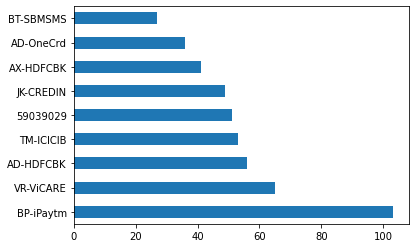

In [ ]:
sender_value_counts = user_msg['sender'].value_counts() 
top_10_sender_value_counts = sender_value_counts.head(9) 
top_10_sender_value_counts.plot.barh()


PAYTM leads..! 
##### This shows that his most transactions were done using Paytm 

<AxesSubplot:>

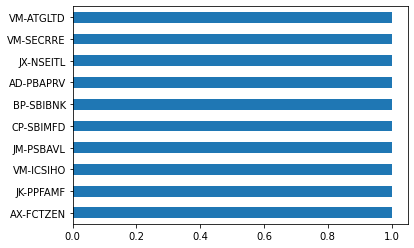

In [ ]:
Least_10_sender_value_counts = sender_value_counts.tail(10) 
Least_10_sender_value_counts.plot.barh()

This shows that the user is less familiar with the above one

### Number of Letters and Words in messages

In [ ]:
user_msg['Letter_Count'] = user_msg['message'].apply(lambda s : len(s))
user_msg['Word_Count'] = user_msg['message'].apply(lambda s : len(s.split(' ')))
user_msg

,sender,message,timestamp,user_id,urlcount,Letter_Count,Word_Count
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0,202,32
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31
...,...,...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1,157,23
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1,195,32
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2,254,31
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22


In [ ]:
average_message_words = user_msg['Word_Count'].mean()
average_message_letters = user_msg['Letter_Count'].mean()

In [ ]:
print('Average Words per Message', round(average_message_words, 2))
print('Average Letters per Message', round(average_message_letters, 2))

Average Words per Message 28.0
Average Letters per Message 180.44


In [ ]:
print("total number of words are :", user_msg.Word_Count.sum())
print("total number of letters are :", user_msg.Letter_Count.sum())

total number of words are : 68463
total number of letters are : 441185


Text(0, 0.5, 'Senders')

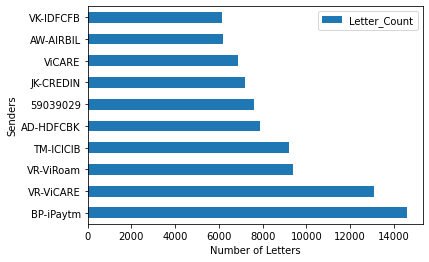

In [ ]:
total_letter_count_grouped_by_author = user_msg[['sender', 'Letter_Count']].groupby('sender').sum()
sorted_total_letter_count_grouped_by_author = total_letter_count_grouped_by_author.sort_values('Letter_Count', ascending=False)
top_10_sorted_total_letter_count_grouped_by_author = sorted_total_letter_count_grouped_by_author.head(10)
top_10_sorted_total_letter_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Letters')
plt.ylabel('Senders')

In [ ]:
def pie_chart(count):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(count)):
        explodex.append(0.05)
    ax = count.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'],shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Contribution of sender \n", fontsize=18)
    plt.tight_layout()
    plt.show()

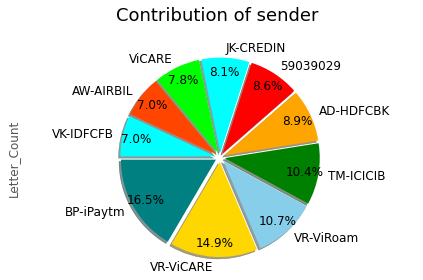

In [ ]:
plt.style.use('ggplot')
Letter_count=user_msg.groupby(['sender'])['Letter_Count'].sum().nlargest(10)
# Using the function defined earlier
pie_chart(Letter_count)

Text(0, 0.5, 'Frequency')

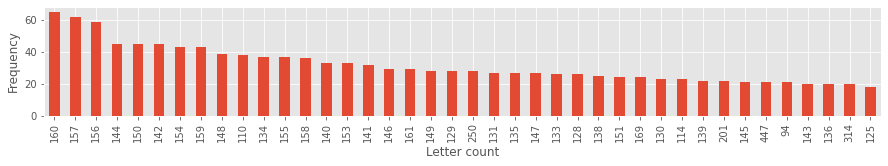

In [ ]:
plt.figure(figsize=(15, 2))
letter_count_value_counts = user_msg['Letter_Count'].value_counts()
top_40_letter_count_value_counts = letter_count_value_counts.head(40)
top_40_letter_count_value_counts.plot.bar()
plt.xlabel('Letter count')
plt.ylabel('Frequency')

This shows that most number of messages include more than 150 letters in it

Text(0, 0.5, 'Senders')

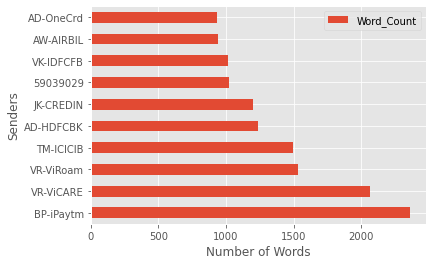

In [ ]:
total_word_count_grouped_by_author = user_msg[['sender', 'Word_Count']].groupby('sender').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
top_10_sorted_total_word_count_grouped_by_author = sorted_total_word_count_grouped_by_author.head(10)
top_10_sorted_total_word_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Words')
plt.ylabel('Senders')

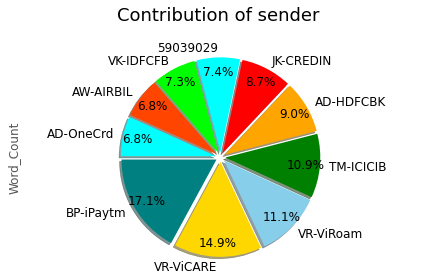

In [ ]:
word_count=user_msg.groupby(['sender'])['Word_Count'].sum().nlargest(10)
pie_chart(word_count)

As expected, Paytm leads in the number of letters and words tooo

Text(0, 0.5, 'Frequency')

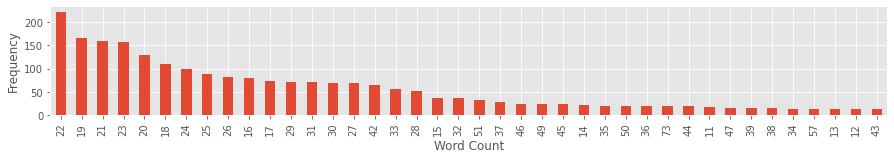

In [ ]:
plt.figure(figsize=(15, 2)) # To ensure that the bar plot fits in the output cell of a Jupyter notebook
word_count_value_counts =user_msg['Word_Count'].value_counts()
top_40_word_count_value_counts = word_count_value_counts.head(40)
top_40_word_count_value_counts.plot.bar()
plt.xlabel('Word Count')
plt.ylabel('Frequency')

Most messages include arounf 20 words in them

###### It's time to bring in Natural Language Processing into action. 

We will find the most used word in the group and then create a word cloud. 

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
messages = []
stop_words = set(stopwords.words('english'))

for words in user_msg['message']:
    only_letters = regex.sub("[^a-zA-Z\w+]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenizing the sentences
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))#converting all letters to lower case
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] #lemmatizing the words i.e converting similar words to their
    # base form while still considering the context in which the words are used 

    messages.append(' '.join(lemmas)) 

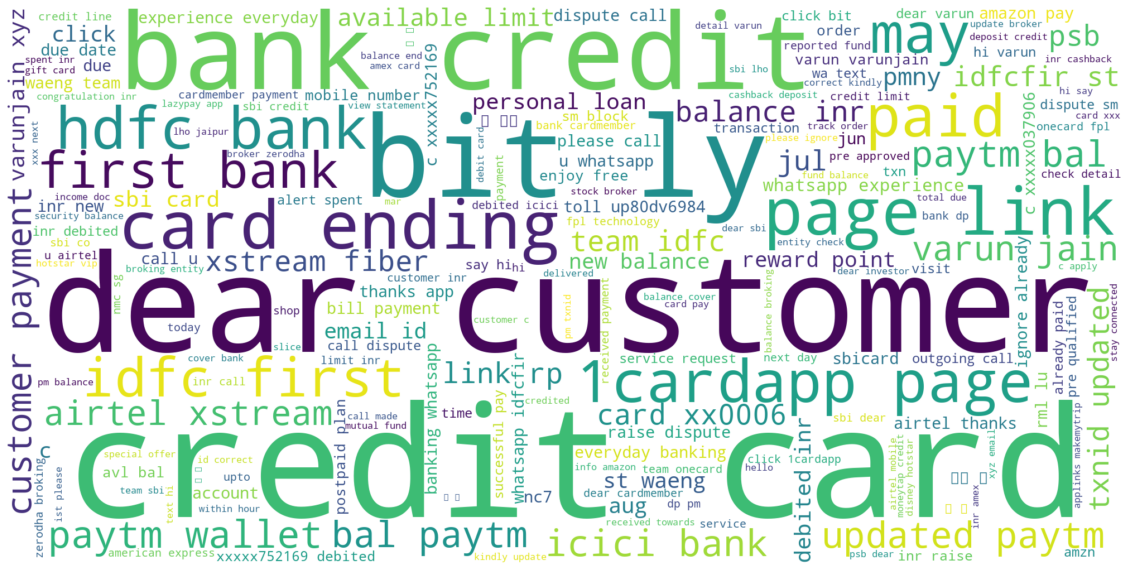

In [ ]:
unique_string=(" ").join(messages)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This shows that the user is active in using credit card too

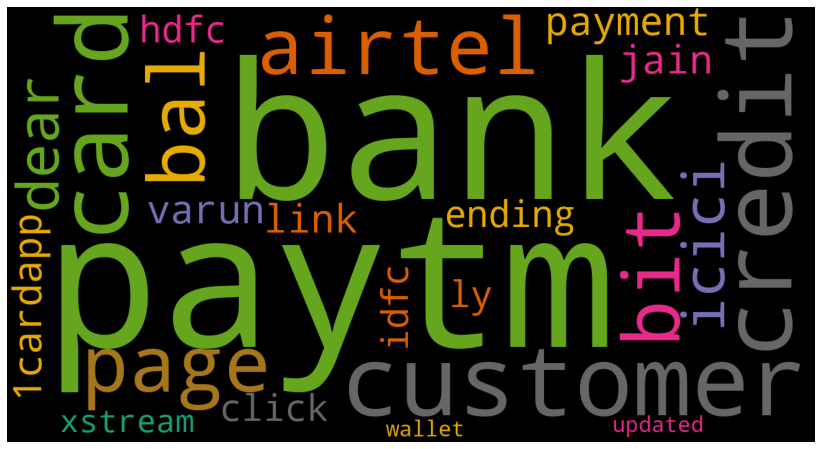

In [ ]:
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
important_words = cv.fit_transform(messages)
fig_words = cv.vocabulary_
unique_data=(" ").join(fig_words)
wordcloud = WordCloud(width = 1300, height = 700,colormap="Dark2").generate(unique_data)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [ ]:
co = CountVectorizer(ngram_range=(2,2),stop_words='english')
counts = co.fit_transform(messages)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(10)

,0
credit card,389
dear customer,295
click http,230
bit ly,193
bank credit,170
card ending,145
page link,137
http bit,114
1cardapp page,110
hdfc bank,108


##### Now, analysing the messages based on date and time

In [ ]:
user_msg

,sender,message,timestamp,user_id,urlcount,Letter_Count,Word_Count
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0,202,32
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31
...,...,...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1,157,23
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1,195,32
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2,254,31
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22


In [ ]:
#Function to seperate date and time from the data
def seperate_dateandtime(date):
    date=date.split(" ")
    date_real=date[0]
    time=date[1]
    return date_real

In [ ]:
# Checking
seperate_dateandtime('2021-03-23 15:34:24.640')

'2021-03-23'

In [ ]:
user_msg['timestamp']=user_msg['timestamp'].astype(str)
user_msg['date']=user_msg['timestamp'].apply(seperate_dateandtime)
user_msg

,sender,message,timestamp,user_id,urlcount,Letter_Count,Word_Count,date
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0,202,32,2021-08-13
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-07
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-03
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-25
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-08
...,...,...,...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1,157,23,2021-07-02
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1,195,32,2021-03-23
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2,254,31,2021-04-29
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-23


Coverting string to the date format using pandas

In [ ]:
user_msg['date'] = pd.to_datetime(user_msg['date'])
user_msg

,sender,message,timestamp,user_id,urlcount,Letter_Count,Word_Count,date
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0,202,32,2021-08-13
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-07
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-03
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-25
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-08
...,...,...,...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1,157,23,2021-07-02
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1,195,32,2021-03-23
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2,254,31,2021-04-29
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-23


In [ ]:
type(user_msg['date'])

pandas.core.series.Series

###### Finding the first and last message

In [ ]:
oldest = user_msg['date'].min() # Earliest date
newest = user_msg['date'].max() # Latest date

In [ ]:
print("data is collected from", oldest)
print("data is collected till",newest)

data is collected from 2021-02-22 00:00:00
data is collected till 2021-09-07 00:00:00


As shown earlier, this includes data from february to september

### MONTH

In [ ]:
user_msg['Month']=user_msg['date'].dt.month

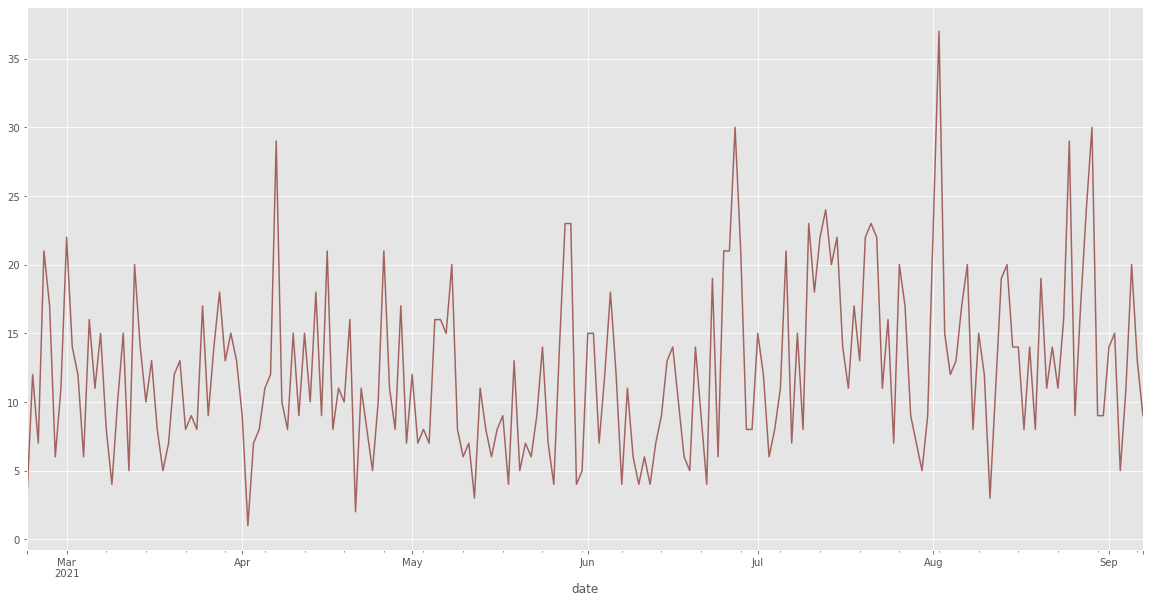

In [ ]:
date_grouped = user_msg.groupby('date')['message'].count().plot(kind='line', figsize=(20,10), color='#A26360')

The above plot shows distribution of messages over the year

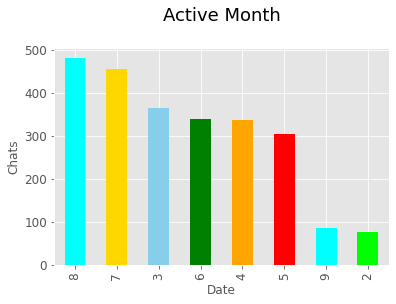

In [ ]:
plt.style.use('ggplot')

active_month=user_msg.groupby(['Month'])['Month'].count().nlargest(15)

def active_month_bar_chart(active_month):
    ax = active_month.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

active_month_bar_chart(active_month)

In [ ]:
user_msg['Mon'] = user_msg['date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
user_msg['Month'] = user_msg['Mon'].map(months)
user_msg.drop('Mon',axis=1,inplace=True)

In [ ]:
active_month = user_msg['Month'].value_counts()

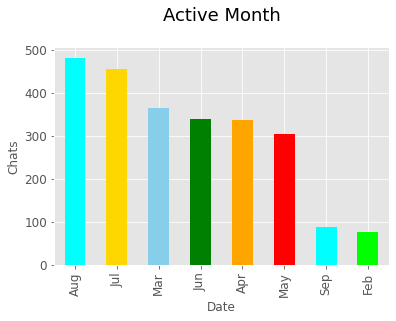

In [ ]:
active_month_bar_chart(active_month)

As seen earlier, most number of messages were sent on July and August

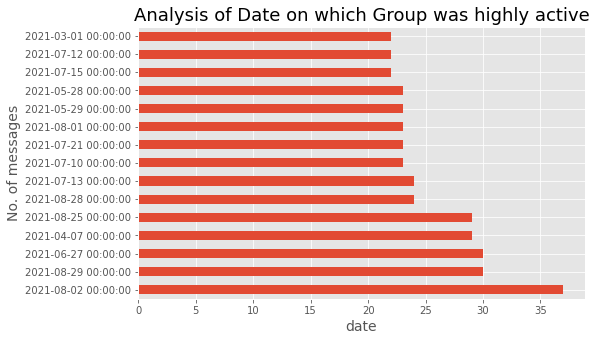

In [ ]:
plt.figure(figsize=(8,5))
user_msg['date'].value_counts().head(15).plot.barh()
plt.xlabel('date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

Most no. of messages were received on 2nd of august

### Time

In [ ]:
def seperate_time(date):
    date=date.split(" ")
    date_real=date[0]
    time=date[1]
    return time

In [ ]:
user_msg['time']=user_msg['timestamp'].apply(seperate_time)
user_msg

,sender,message,timestamp,user_id,urlcount,Letter_Count,Word_Count,date,Month,time
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0,202,32,2021-08-13,8,19:28:17.622
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-07,5,14:10:06.273
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-03,5,12:23:34.185
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-25,8,15:39:50.370
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-08,5,09:32:30.859
...,...,...,...,...,...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1,157,23,2021-07-02,7,18:15:30.582
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1,195,32,2021-03-23,3,10:16:56.207
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2,254,31,2021-04-29,4,09:11:37.708
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-23,8,16:16:55.347


In [ ]:
user_msg['Hours'] = user_msg['time'].apply(lambda x : x.split(':')[0])

In [ ]:
user_msg.time = pd.to_datetime(user_msg.time).dt.time


In [ ]:
user_msg

,sender,message,timestamp,user_id,urlcount,Letter_Count,Word_Count,date,Month,time,Hours
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0,202,32,2021-08-13,8,19:28:17.622000,19
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-07,5,14:10:06.273000,14
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-03,5,12:23:34.185000,12
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-25,8,15:39:50.370000,15
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-08,5,09:32:30.859000,09
...,...,...,...,...,...,...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1,157,23,2021-07-02,7,18:15:30.582000,18
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1,195,32,2021-03-23,3,10:16:56.207000,10
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2,254,31,2021-04-29,4,09:11:37.708000,09
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-23,8,16:16:55.347000,16


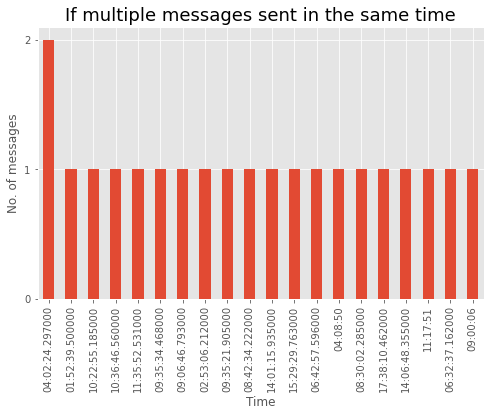

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8,5))
t = user_msg['time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('If multiple messages sent in the same time',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

There is only one instance where user has recieved 2 messages

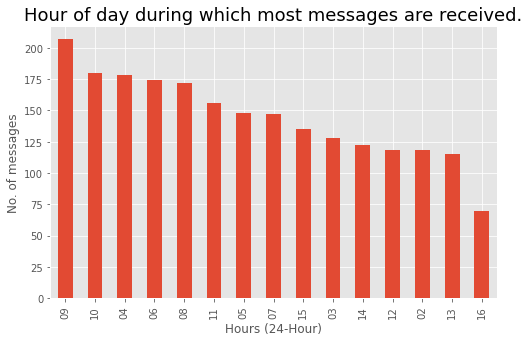

In [ ]:
plt.figure(figsize=(8,5))
std_time = user_msg['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Hour of day during which most messages are received.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

Most number of msgs were received around 9 am

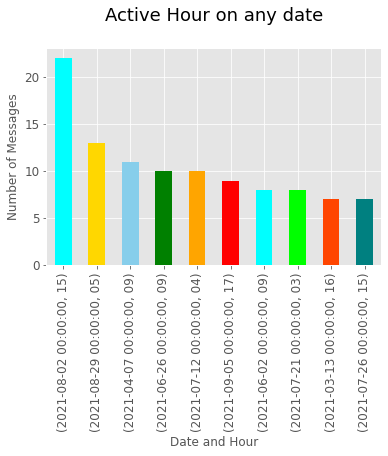

In [ ]:
plt.style.use('ggplot')

active_hour=user_msg.groupby(['date','Hours'])['Hours'].count().nlargest(10)

def active_hours_bar_chart(active_hour):
    ax = active_hour.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Hour on any date\n", fontsize=18)
    ax.set_xlabel("Date and Hour", fontsize=12)
    ax.set_ylabel("Number of Messages", fontsize=12)
    plt.show()

active_hours_bar_chart(active_hour)

But from 3-4pm on a particualr most number of messages were received in any one hour time span

### DAY

In [ ]:
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thursday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
user_msg['Day'] = user_msg['date'].dt.weekday.map(weeks)

### Changing the datatype of column "Day".
user_msg['Day'] = user_msg['Day'].astype('category')
user_msg

,sender,message,timestamp,user_id,urlcount,Letter_Count,Word_Count,date,Month,time,Hours,Day
4577140,TM-ICICIB,"Dear Customer, INR 1,327.00 is debited on ICIC...",2021-08-13 19:28:17.622,2ddd42ce-245c-4c98-a563-a45435038a67,0,202,32,2021-08-13,8,19:28:17.622000,19,Friday
4577141,AD-LZYPAY,"Dear Customer, your payment of Rs.310.10 for t...",2021-05-07 14:10:06.273,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-07,5,14:10:06.273000,14,Friday
4577142,AX-LZYPAY,"Dear Customer, your payment of Rs.249.19 for t...",2021-05-03 12:23:34.185,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-03,5,12:23:34.185000,12,Monday
4577143,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 562...",2021-08-25 15:39:50.370,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-25,8,15:39:50.370000,15,Wednesday
4577144,AD-LZYPAY,"Dear Customer, your payment of Rs.447.40 for t...",2021-05-08 09:32:30.859,2ddd42ce-245c-4c98-a563-a45435038a67,2,255,31,2021-05-08,5,09:32:30.859000,09,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
4591611,JX-SBICRD,Rs.270.00 spent on your SBI Card ending with 2...,2021-07-02 18:15:30.582,2ddd42ce-245c-4c98-a563-a45435038a67,1,157,23,2021-07-02,7,18:15:30.582000,18,Friday
4591625,VR-ViCARE,Hi! Claim your 1 Year Disney+ Hotstar VIP subs...,2021-03-23 10:16:56.207,2ddd42ce-245c-4c98-a563-a45435038a67,1,195,32,2021-03-23,3,10:16:56.207000,10,Tuesday
4726955,AX-LZYPAY,"Dear Customer, your payment of Rs.264.62 for t...",2021-04-29 09:11:37.708,2ddd42ce-245c-4c98-a563-a45435038a67,2,254,31,2021-04-29,4,09:11:37.708000,09,Thursday
4726956,AD-LZYPAY,"Dear LazyPay Customer, your payment of Rs. 216...",2021-08-23 16:16:55.347,2ddd42ce-245c-4c98-a563-a45435038a67,1,158,22,2021-08-23,8,16:16:55.347000,16,Monday


In [ ]:
l = user_msg.Day.unique()
for i in range(len(l)):
  req_df = user_msg[user_msg["Day"] == l[i]]
  print(l[i],'  ->  ',req_df.shape[0])

Friday   ->   324
Monday   ->   371
Wednesday   ->   344
Saturday   ->   364
Tuesday   ->   345
Sunday   ->   367
Thursday   ->   330


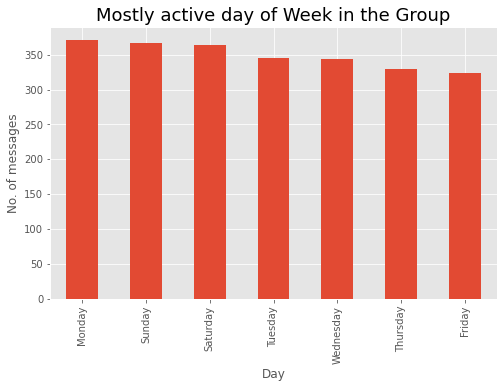

In [ ]:

plt.figure(figsize=(8,5))
active_day = user_msg['Day'].value_counts()
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

So, almost all days receive same no. of messages

This can be extended to any user or even to all users at once

## FUTURE WORK

Sentiment Analysis can be on the messages to find if there is any kind of bullying or herrasement or blackmail from anyone.